# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [607]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation

In [608]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [609]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [610]:
data.shape

(5391, 6)

In [611]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [612]:
data.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
5390,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


In [613]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [614]:
data.sample()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1219,4919,3/19/1999,Sparkler,"$1,000,000","$5,494","$5,494"


In [615]:
data.isnull().values.any()

False

In [616]:
data.duplicated().values.any()

False

In [617]:
duplicated_rows = data[data.duplicated()]
len(duplicated_rows)

0

In [618]:
data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [619]:
chars_to_remove = ["$", ","]
columns_to_clean = ['USD_Production_Budget',
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']

for column in columns_to_clean:
  for char in chars_to_remove:
    data[column] = data[column].astype('str').str.replace(char, "")
  data[column] = pd.to_numeric(data[column])

<ipython-input-619-12fa631cfe36>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[column] = data[column].astype('str').str.replace(char, "")


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [620]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
data['Release_Date']

0      1915-08-02
1      1916-05-09
2      1916-12-24
3      1920-09-17
4      1925-01-01
          ...    
5386   2018-10-08
5387   2018-12-18
5388   2020-12-31
5389   2020-12-31
5390   2020-12-31
Name: Release_Date, Length: 5391, dtype: datetime64[ns]

In [621]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [622]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [623]:
data['USD_Production_Budget'].mean()

31113737.57837136

In [624]:
data['USD_Worldwide_Gross'].mean()

88855421.96271564

In [625]:
data['USD_Worldwide_Gross'].min()

0

In [626]:
data['USD_Domestic_Gross'].min()

0

In [627]:
data['Revenue'] = data['USD_Worldwide_Gross'] - data['USD_Production_Budget']

In [628]:
percent_25_movies = len(data) - int(len(data) * 0.25)

bottom_movies = data[data['Rank'] >= percent_25_movies].sort_values(by='Rank')

profitable_bottom_movies = len(bottom_movies[bottom_movies['Revenue'] > 0])
non_profitable_bottom_movies = len(bottom_movies[bottom_movies['Revenue'] < 0])

print(f"There are {len(bottom_movies)} movies at the bottom 25%:\n{profitable_bottom_movies} are profitable and {non_profitable_bottom_movies} don´t have any revenue.")

There are 1348 movies at the bottom 25%:
611 are profitable and 737 don´t have any revenue.


In [629]:
data['USD_Production_Budget'].max()

425000000

In [630]:
data['USD_Worldwide_Gross'].max()

2783918982

In [631]:
data.sort_values(by=['Rank'], inplace=True)

In [632]:
data.iloc[0]

Rank                                       1
Release_Date             2009-12-18 00:00:00
Movie_Title                           Avatar
USD_Production_Budget              425000000
USD_Worldwide_Gross               2783918982
USD_Domestic_Gross                 760507625
Revenue                           2358918982
Name: 3529, dtype: object

In [633]:
data.iloc[-1]

Rank                                    5391
Release_Date             2005-05-08 00:00:00
Movie_Title                My Date With Drew
USD_Production_Budget                   1100
USD_Worldwide_Gross                   181041
USD_Domestic_Gross                    181041
Revenue                               179941
Name: 2427, dtype: object

# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [634]:
len(data[data['USD_Domestic_Gross'] == 0])

512

In [635]:
data[data['USD_Domestic_Gross'] == 0].head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0,-75452340
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0,-16919875
5338,879,2017-04-08,The Dark Tower,60000000,0,0,-60000000
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0,-60000000
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0,-50000000
4295,1230,2012-12-31,Foodfight!,45000000,73706,0,-44926294


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [636]:
len(data[data['USD_Worldwide_Gross'] == 0])

357

In [637]:
data[data['USD_Worldwide_Gross'] == 0].head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000
5338,879,2017-04-08,The Dark Tower,60000000,0,0,-60000000
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0,-60000000
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0,-50000000
5092,1435,2015-12-31,The Crow,40000000,0,0,-40000000
3300,1631,2008-12-31,Black Water Transit,35000000,0,0,-35000000
5045,1656,2015-10-30,Freaks of Nature,33000000,0,0,-33000000


### Filtering on Multiple Conditions

In [638]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) &
                                  (data.USD_Worldwide_Gross != 0)]

print(f"Number of international releases: {len(international_releases)}")
international_releases.head()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0,-75452340
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0,-16919875
4295,1230,2012-12-31,Foodfight!,45000000,73706,0,-44926294
2836,1270,2006-12-31,Les Bronzés 3: amis pour la vie,42000000,83833602,0,41833602
5091,1271,2015-12-31,Pourquoi j'ai pas mangé mon père,42000000,182156,0,-41817844


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [639]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')

print(f"Number of international releases: {len(international_releases)}")
international_releases.head()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0,-75452340
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0,-16919875
4295,1230,2012-12-31,Foodfight!,45000000,73706,0,-44926294
2836,1270,2006-12-31,Les Bronzés 3: amis pour la vie,42000000,83833602,0,41833602
5091,1271,2015-12-31,Pourquoi j'ai pas mangé mon père,42000000,182156,0,-41817844


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [640]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [641]:
future_releases = data.query('Release_Date >= @scrape_date')
future_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0,-50000000
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0,-20000000
5386,2950,2018-10-08,Meg,15000000,0,0,-15000000


In [642]:
len(future_releases)

7

In [643]:
data_clean = data.drop(future_releases.index)

### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [644]:
money_losing = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
money_losing.shape[0]/data_clean.shape[0]

0.37277117384843983

# Seaborn for Data Viz: Bubble Charts

In [645]:
import seaborn as sns

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

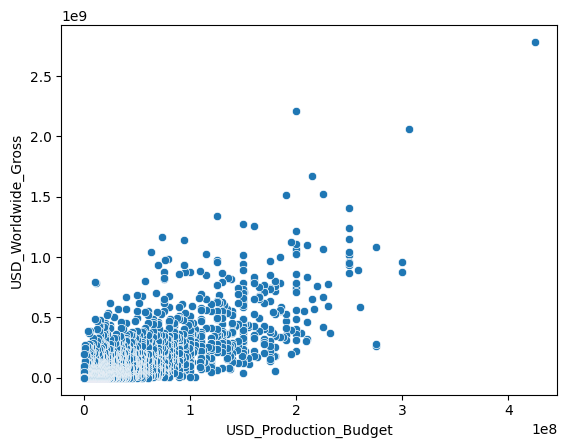

In [646]:
sns.scatterplot(data=data_clean,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross')

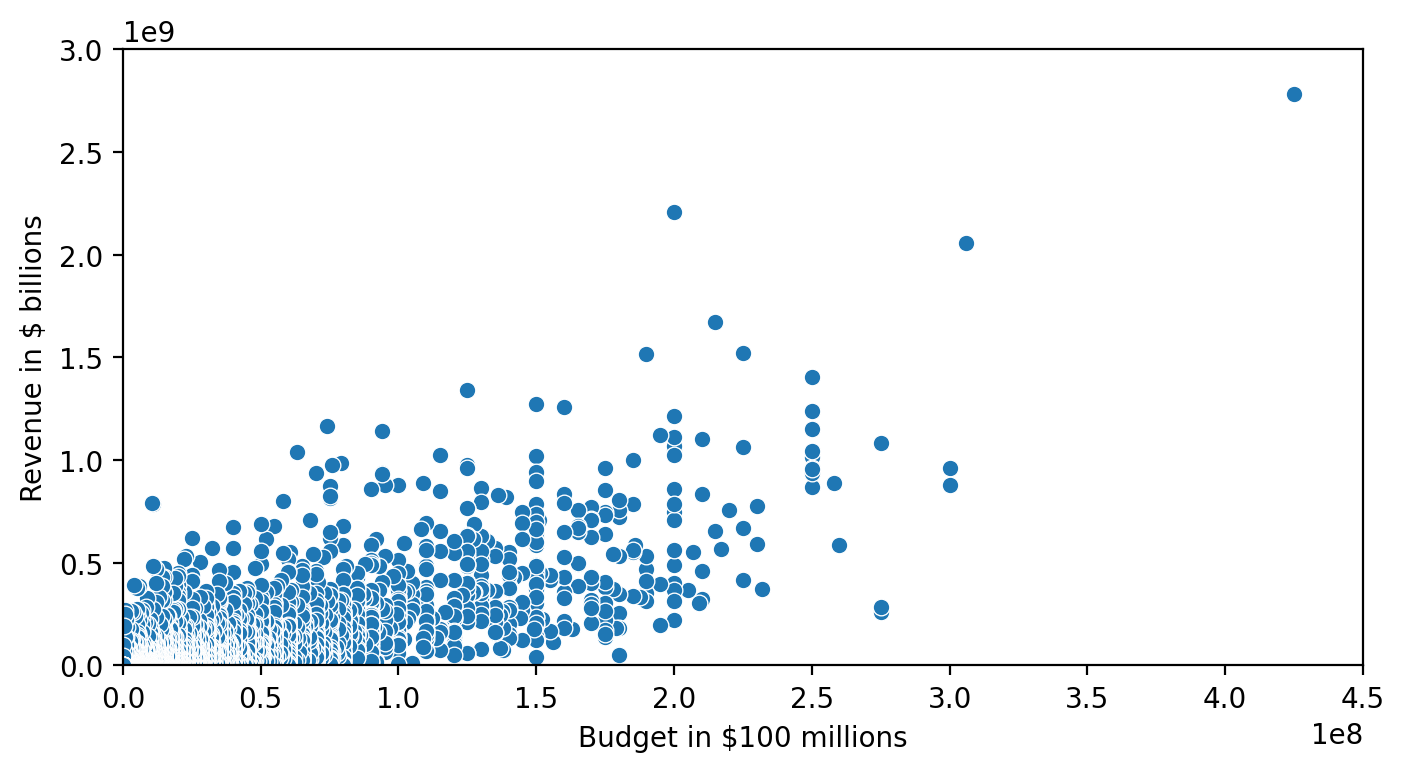

In [647]:
plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget',
                     y='USD_Worldwide_Gross')

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



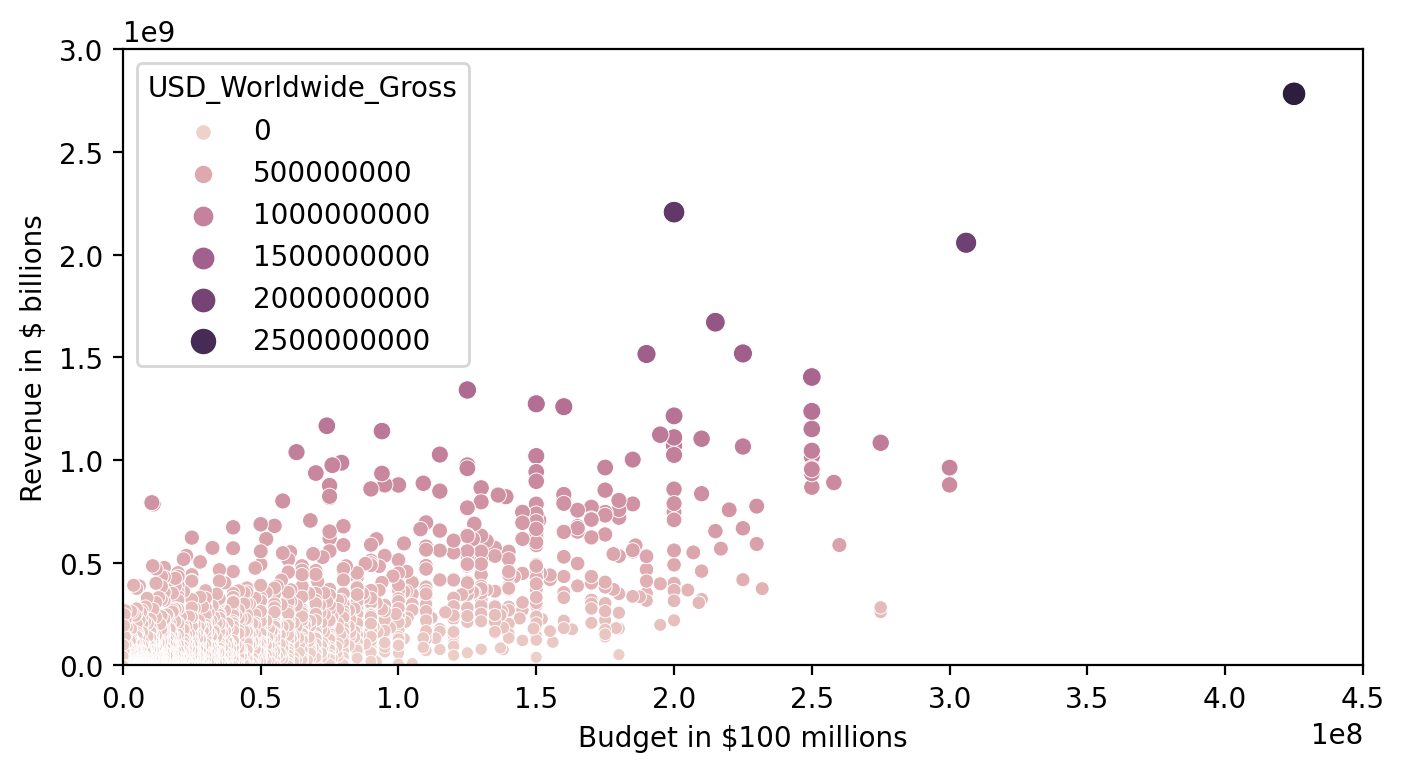

In [648]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget',
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)

plt.show()

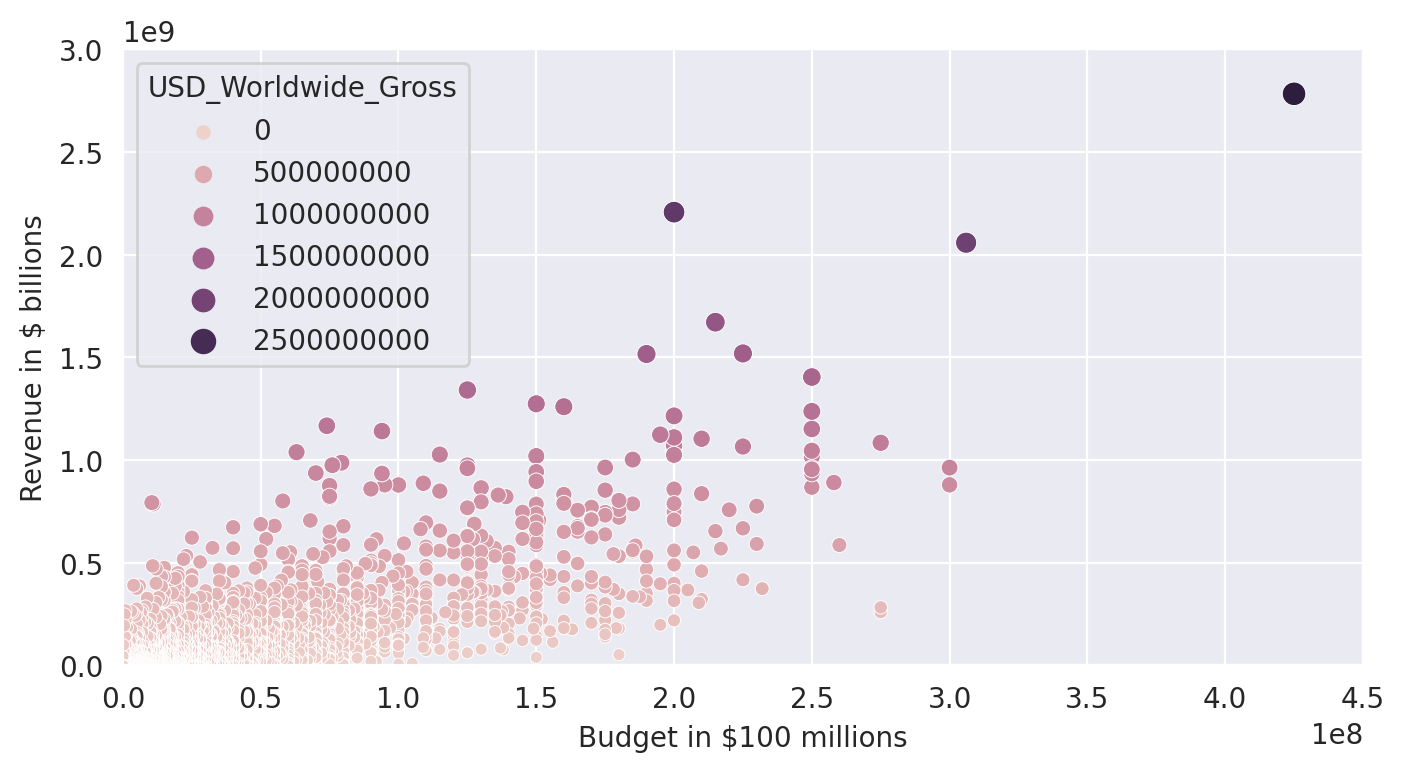

In [649]:
plt.figure(figsize=(8,4), dpi=200)

# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget',
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')

  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

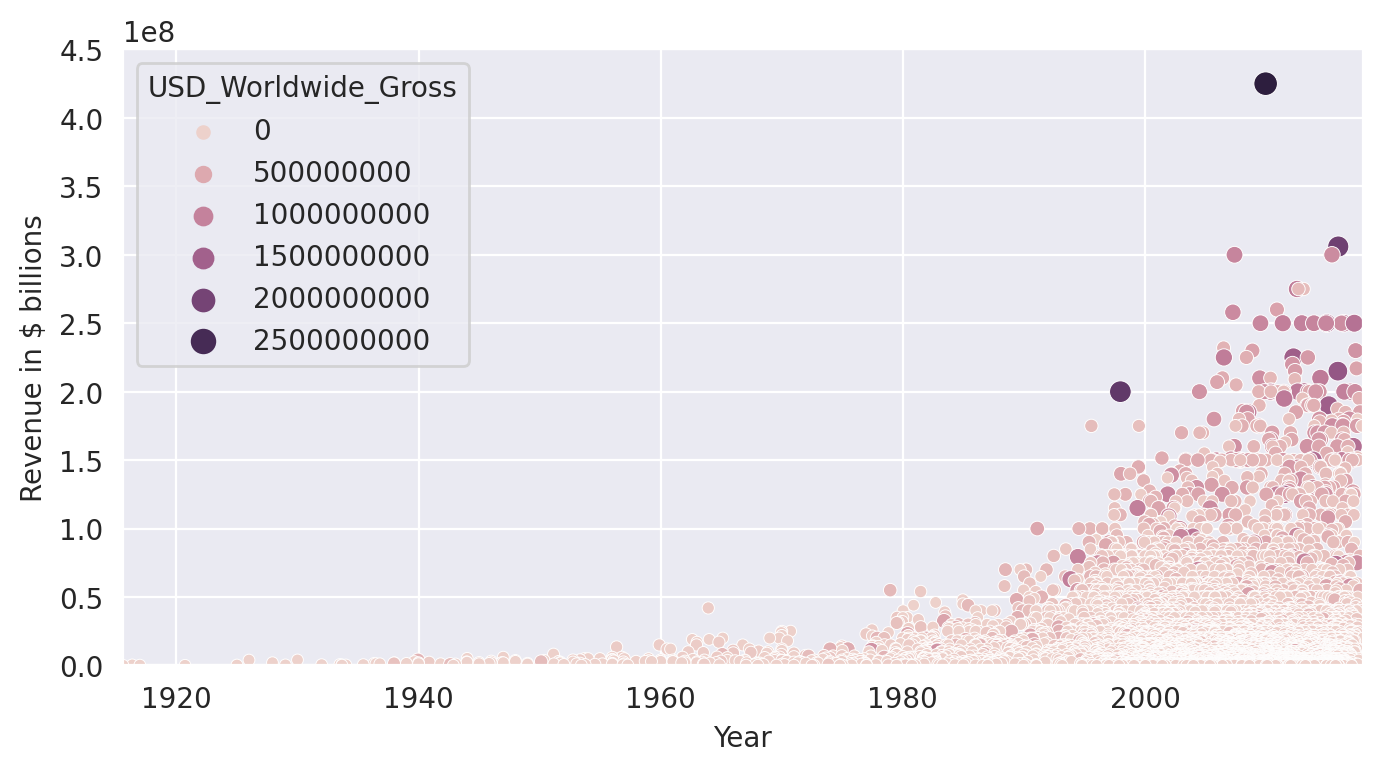

In [680]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                      x='Release_Date',
                      y='USD_Production_Budget',
                      hue='USD_Worldwide_Gross', # colour
                      size='USD_Worldwide_Gross',) # dot size

  ax.set(ylim=(0, 450000000),
         xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
         ylabel='Revenue in $ billions',
         xlabel='Year')


# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [659]:
data_clean["Decade"] = data_clean['Release_Date'].dt.year // 10 * 10
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue,Decade
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625,2358918982,2000
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225,1752662225,2010
2911,3,2007-05-24,Pirates of the Caribbean: At World’s End,300000000,963420425,309420425,663420425,2000
4925,4,2015-06-11,Spectre,300000000,879620923,200074175,579620923,2010
4196,5,2012-07-20,The Dark Knight Rises,275000000,1084439099,448139099,809439099,2010
...,...,...,...,...,...,...,...,...
1209,5387,1999-02-04,Following,6000,240495,48482,234495,1990
2462,5388,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-3662,2000
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0,-5000,2010
5007,5390,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [682]:
old_films = data_clean.query('Decade <= 1960')

In [684]:
new_films = data_clean.query('Decade >= 1970')

In [688]:
print(f"{len(old_films)} films were relesed prior to 1970.")

153 films were relesed prior to 1970.


In [694]:
old_films.sort_values(by="USD_Production_Budget", ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,29000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,9208099,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,11678778,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,-12000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,-4526667,1960


# Seaborn Regression Plots

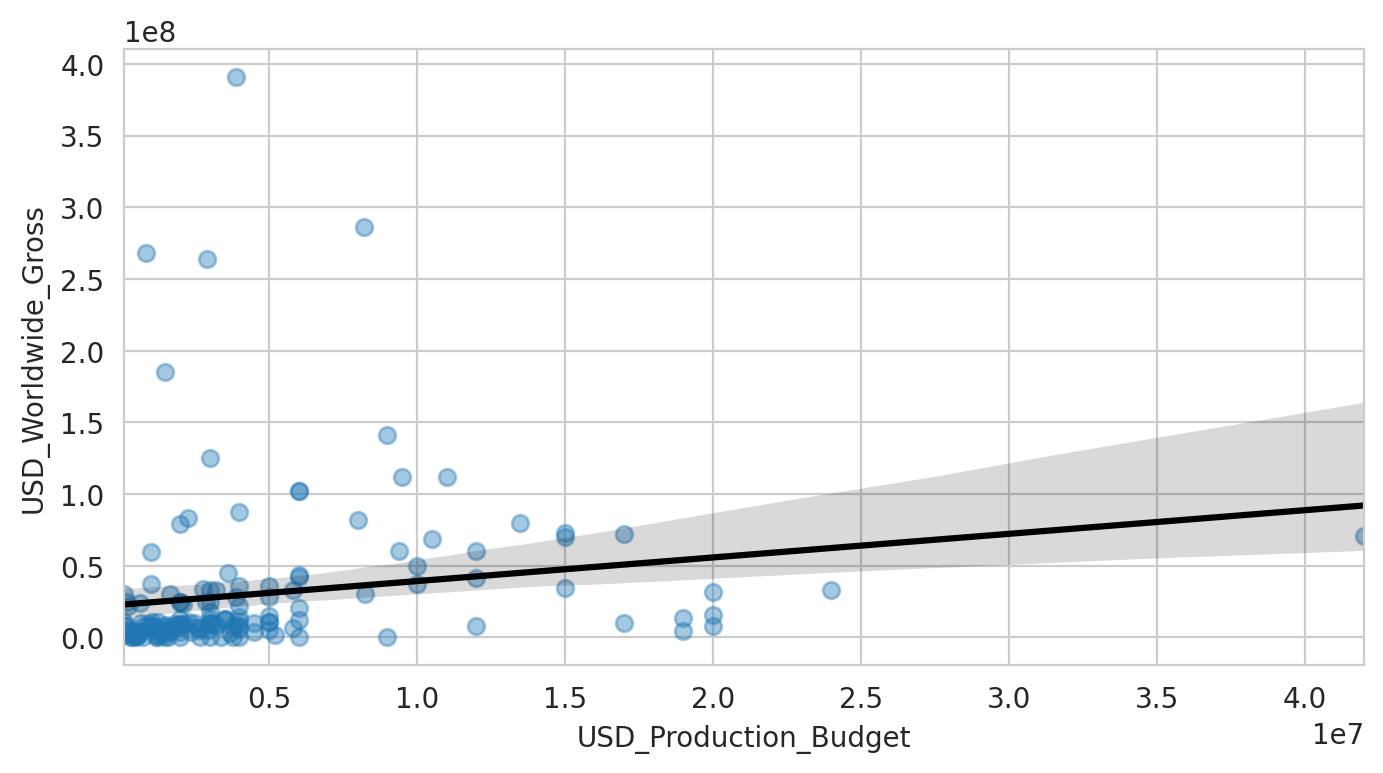

In [704]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  ax = sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

  ax.set(xlim=(old_films.USD_Production_Budget.min(), old_films.USD_Production_Budget.max()))

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

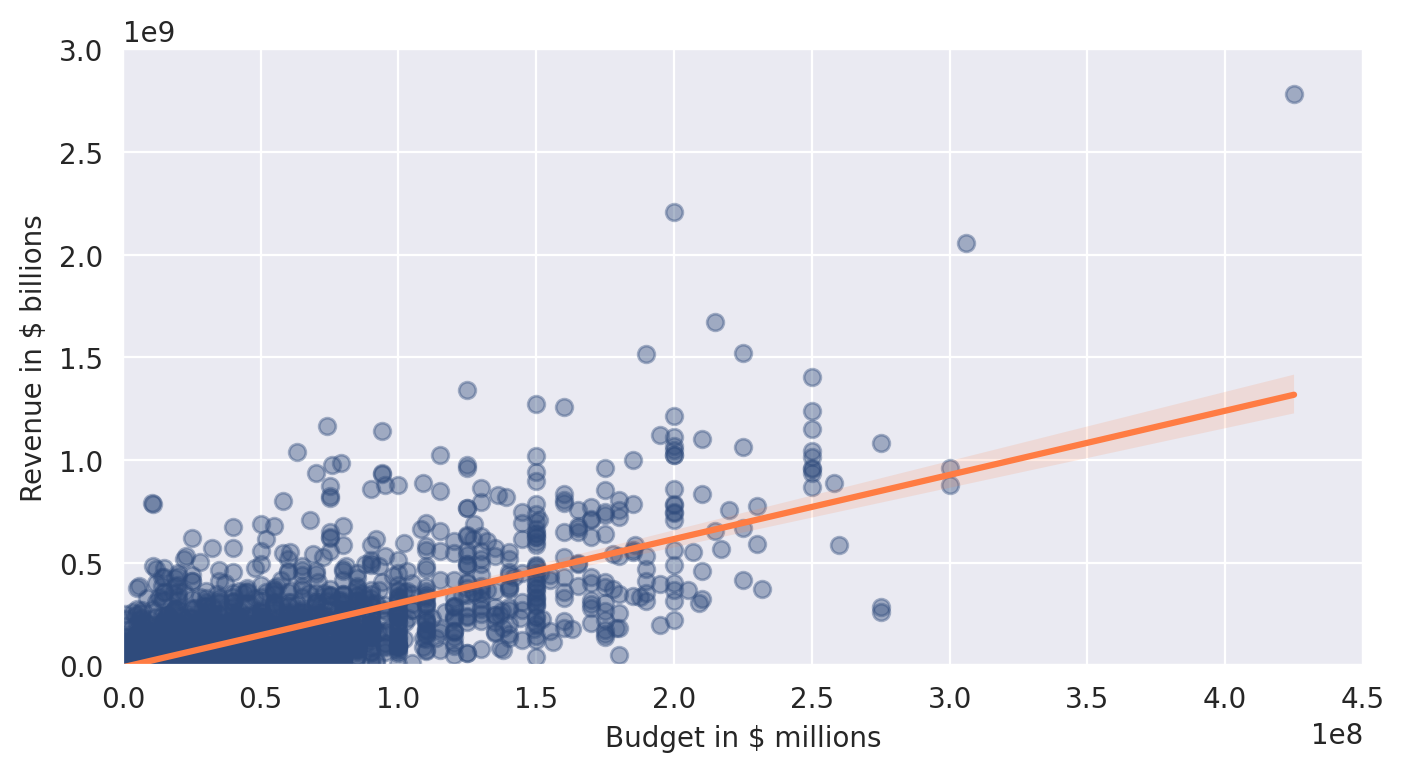

In [714]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  ax = sns.regplot(data=new_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4, 'color': '#2f4b7c'},
            line_kws = {'color': '#ff7c43'})

  ax.set(
      ylim=(0,3000000000),
      xlim=(0, 450000000),
      ylabel="Revenue in $ billions",
      xlabel="Budget in $ millions"
      )

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [715]:
from sklearn.linear_model import LinearRegression

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [716]:
regression = LinearRegression()

In [717]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

In [718]:
# Find the best-fit line
regression.fit(X, y)

LinearRegression()

In [719]:
#Theta zero
regression.intercept_

array([-8650768.00661024])

In [720]:
#Theta one
regression.coef_

array([[3.12259592]])

In [722]:
# R-squared
regression.score(X, y)

0.5577032617720403

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?

In [723]:
regression_old_films = LinearRegression()

In [724]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

In [726]:
regression_old_films.fit(X,y)

LinearRegression()

In [733]:
regression_old_films.intercept_

22821538.635080382

In [735]:
regression_old_films.coef_[0][0]

1.6477131440107318

In [729]:
regression_old_films.score(X, y)

0.02937258620576877

In [738]:
regression_old_films.intercept_[0] + regression_old_films.coef_[0][0] * 350000000

599521139.0388365

In [741]:
budget = 350000000
revenue_estimate = regression_old_films.intercept_[0] + regression_old_films.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
